In [ ]:
# --- Text Analysis of Stages ---
print("\n=== The Stages of Body Construction ===\n")

# Check if we have any body trades
if body_trades.empty:
    print("❌ No 'Yes' trades found in the middle buckets.")
    print("This means the trader did NOT build a 'Body' in this dataset.")
    print("The data in elon.json might only contain the 'Wings' (No trades) and 'Moonshot' (High Yes trades).")
else:
    # Divide timeline into 3 chunks
    start = body_trades['trade_dttm'].min()
    end = body_trades['trade_dttm'].max()
    duration = end - start
    chunk = duration / 3

    stage1_end = start + chunk
    stage2_end = start + (chunk * 2)

    print(f"📅 Stage 1 (Broad Net): {start.strftime('%b %d %H:%M')} to {stage1_end.strftime('%b %d %H:%M')}")
    s1 = body_trades[body_trades['trade_dttm'] < stage1_end]
    print(f"Total Invested: ${(s1['price'] * s1['amount']).sum():,.2f}")
    print("Top 3 Buckets:")
    print(s1['market_subtitle'].value_counts().head(3))

    print(f"\n📅 Stage 2 (Filtering): {stage1_end.strftime('%b %d %H:%M')} to {stage2_end.strftime('%b %d %H:%M')}")
    s2 = body_trades[(body_trades['trade_dttm'] >= stage1_end) & (body_trades['trade_dttm'] < stage2_end)]
    print(f"Total Invested: ${(s2['price'] * s2['amount']).sum():,.2f}")
    print("Top 3 Buckets:")
    print(s2['market_subtitle'].value_counts().head(3))

    print(f"\n📅 Stage 3 (Sniper): {stage2_end.strftime('%b %d %H:%M')} to {end.strftime('%b %d %H:%M')}")
    s3 = body_trades[body_trades['trade_dttm'] >= stage2_end]
    print(f"Total Invested: ${(s3['price'] * s3['amount']).sum():,.2f}")
    print("Top 3 Buckets:")
    print(s3['market_subtitle'].value_counts().head(3))


=== The Stages of Body Construction ===

❌ No 'Yes' trades found in the middle buckets.
This means the trader did NOT build a 'Body' in this dataset.
The data in elon.json might only contain the 'Wings' (No trades) and 'Moonshot' (High Yes trades).


Bad pipe message: %s [b'0.9,image/avif,image/webp,image/apng,*/*;q=0.8\r\nHost: localhost:42413\r\nUser-Agent: Mozilla/5.0 (Windows NT 10.0;', b'in64; x64) AppleWebKit/537.36 (', b'TML, like Gecko) Chrome/143.0.0.0 Safari/537.36\r\nAccept-Encoding: gzip, de']
Bad pipe message: %s [b'ate, br, zstd\r\nAccept-Language: en-US,en;q=0.6\r\nCache-Control: max-age=0\r\nReferer: https://glorious-f']
Bad pipe message: %s [b'tnight-4jq7q9q4j6pqcw6j.github.dev/\r\nX-Request-ID: be18e5a2a422d12efda65319647804f5\r\nX-Real-IP: 103.75.11.69\r\n']
Bad pipe message: %s [b'Forwarded-Port: 443\r\nX-Forwarded-Scheme: https\r\nX-Original-URI: /\r\nX-Scheme: https\r\nsec', b'pc: 1\r\nsec-fetch-site: same-site\r\nsec-fetch-', b'de: navigate\r\nsec-fetch-dest: document\r\nsec-ch-ua: "Brave";v="143", "Chromium";v="143", "Not A(Brand";v="24"', b'sec-ch-ua-mo']
Bad pipe message: %s [b'le: ?0\r\nsec-ch-ua-platform: "Windows"\r\npriority: u=0, i\r\nX-Forwarded-Proto: https\r\nX-Forwarded-Ho', b': glorious-fortnight

Data loaded successfully.


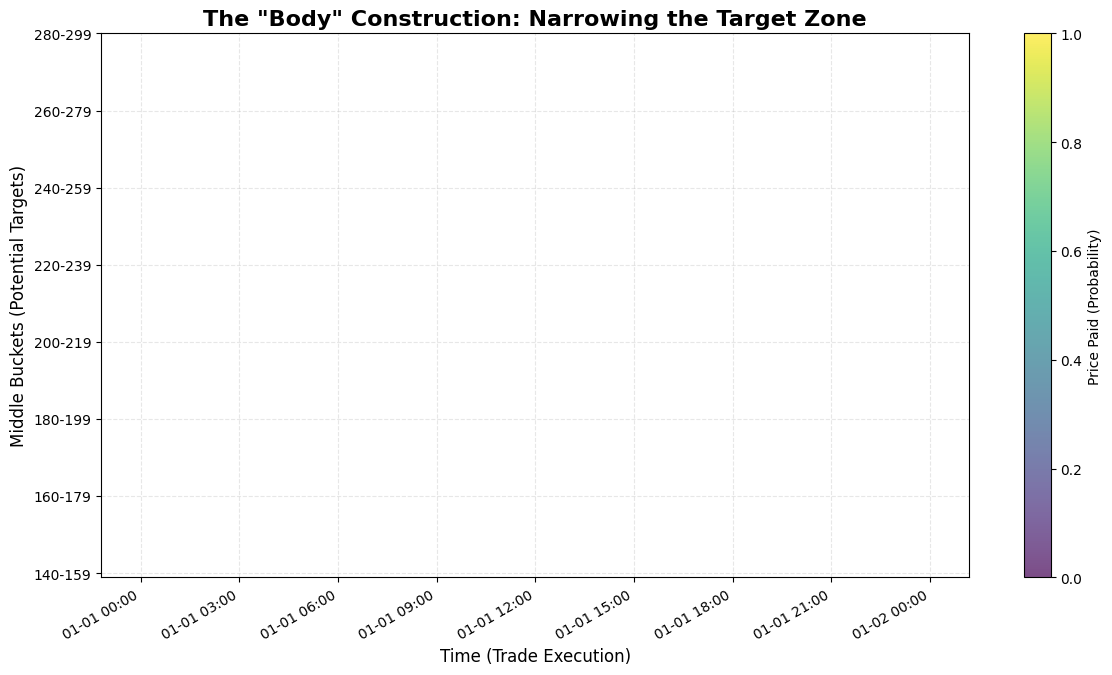

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load data
try:
    with open('elon.json', 'r') as f:
        data = json.load(f)
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: 'elon.json' not found.")

df = pd.DataFrame(data['data'])
df['trade_dttm'] = pd.to_datetime(df['trade_dttm'])
df['amount'] = pd.to_numeric(df['amount'])
df['price'] = pd.to_numeric(df['price'])

# Sort by time
df = df.sort_values('trade_dttm')

# Filter for the "Middle" Buckets (The Body)
middle_buckets = [
    "140-159", "160-179", "180-199", 
    "200-219", "220-239", "240-259", 
    "260-279", "280-299"
]

# Filter for "Yes" trades in the middle
body_trades = df[
    (df['market_subtitle'].isin(middle_buckets)) & 
    (df['outcome'] == 'Yes') & 
    (df['side'] == 'buy')
].copy()

# Map buckets to numeric Y-values for plotting
bucket_map = {b: i for i, b in enumerate(middle_buckets)}
body_trades['y_val'] = body_trades['market_subtitle'].map(bucket_map)

# --- Visualization ---
plt.figure(figsize=(14, 8))
plt.scatter(
    body_trades['trade_dttm'], 
    body_trades['y_val'], 
    s=body_trades['amount'] * 0.1, # Scale size
    c=body_trades['price'], # Color by price paid
    cmap='viridis', 
    alpha=0.7,
    edgecolors='black'
)

plt.yticks(range(len(middle_buckets)), middle_buckets)
plt.title('The "Body" Construction: Narrowing the Target Zone', fontsize=16, fontweight='bold')
plt.ylabel('Middle Buckets (Potential Targets)', fontsize=12)
plt.xlabel('Time (Trade Execution)', fontsize=12)
plt.colorbar(label='Price Paid (Probability)')
plt.grid(True, linestyle='--', alpha=0.3)

# Format Dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
plt.gcf().autofmt_xdate()

plt.show()

# Butterfly Strategy Analysis: Staged Execution

This notebook analyzes how the trader "Annica" constructs the "Body" of the Butterfly spread in stages, narrowing down the target zone over time.